# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

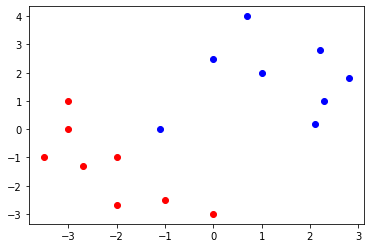

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
Y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, Y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here.**

**Note: You cannot use sklearn SVM functions here.**

**Answer to theory question:   
Added the solution for this in a separate PDF.**

In [4]:
# Write your code here
parameters = []
def svm():
  global parameters
  P = [[1, .0, .0], [.0, 1, .0], [.0, .0, .0]]
  X_rows = X.shape[0]
  augmented_X = np.hstack((X, np.ones((X_rows,1))))
  var = cp.Variable(3)
  prob = cp.Problem(cp.Minimize(cp.quad_form(var, P)) * 0.5, [(y*(x.T@var)) >= 1 for y, x in zip(Y, augmented_X)])
  prob.solve()
  print("Value of w = ", var.value[:2])
  print("Value of b = ", var.value[2])
  parameters = var.value
svm()

Value of w =  [-1.73913043 -1.30434783]
Value of b =  -2.91304347826087


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [5]:
# Write your code here
def plot_decision_boundary():
  axes = plt.gca()
  slope = -parameters[0]/parameters[1]
  intercept = -parameters[2]/parameters[1]
  x_vals = np.array(axes.get_xlim())
  plt.plot(x_vals, intercept + slope * x_vals)

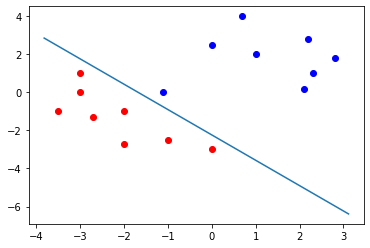

In [6]:
plot_points(X, Y)
plot_decision_boundary()
plt.show()

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

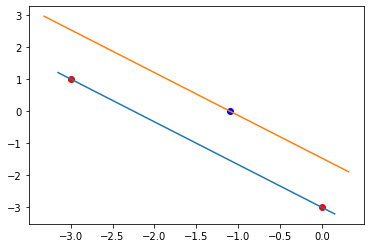

In [7]:
def gutter_points():
  gutterx = []
  guttery = []
  X_rows = X.shape[0]
  augmented_X = np.hstack((X, np.ones((X_rows,1))))
  for (x, y) in zip(augmented_X, Y):
    if np.isclose(x.T@parameters, +1) or np.isclose(x.T@parameters, -1):  # these points will be +1 or -1 away
      gutterx.append(x[:2])
      guttery.append(y)
  gutterx = np.array(gutterx)
  guttery = np.array(guttery)
  return gutterx, guttery

def plot_support_margins():
  # margins differ by constant of 1 and -1. 
  # So I added 1, then subtracted 2, and then reset the bias.
  parameters[2] = parameters[2]-1
  plot_decision_boundary()
  parameters[2] = parameters[2]+2
  plot_decision_boundary()
  parameters[2] = parameters[2]-1

plot_points(*gutter_points())
plot_support_margins()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [8]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.append(X, [[-4, -10], [4, 4]], axis = 0)
Y = np.append(Y, [1, -1], axis = 0)
print("Updated X is:")
print(X)
print("Updated y is")
print(Y)

Updated X is:
[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]
Updated y is
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]


Value of w =  [-1.73913043 -1.30434783]
Value of b =  -2.9130434782608705


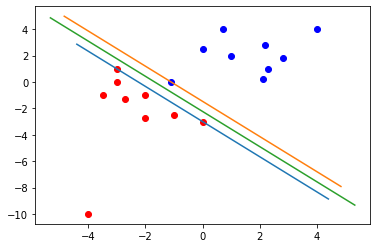

In [9]:
# Solve for the decision boundary using this modified dataset
svm()
plot_points(X, Y)
plot_support_margins()
plot_decision_boundary()
plt.show()

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

Running for C =  0.01
Value of w =  [-0.22506809 -0.19858949]
Value of b =  0.013672178988326457


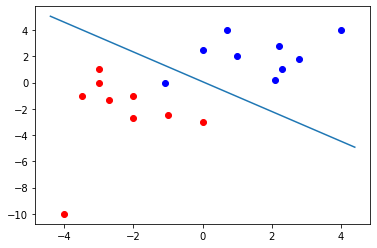

In [10]:
# Write your code here for C= 0.01
def svm_softconstraints(C):
  global parameters
  print("Running for C = ", C)
  P = [[1, .0, .0], [.0, 1, .0], [.0, .0, .0]]
  P = np.array(P)
  X_rows = X.shape[0]
  augmented_X = np.hstack((X, np.ones((X_rows,1))))
  var = cp.Variable(3)
  Xaug_rows = augmented_X.shape[0]
  temp = cp.Variable(Xaug_rows)
  prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(var, P) + C*cp.sum(temp)),
                 [(y*(x.T@var)) >= (1-temp[i]) for y, x, i in zip(Y, augmented_X, range(augmented_X.shape[0]))] + [temp[i]>=0 for  i in range(augmented_X.shape[0])])
  prob.solve()
  print("Value of w = ", var.value[:2])
  print("Value of b = ", var.value[2])
  parameters  = var.value

C = 0.01
svm_softconstraints(C)
plot_points(X, Y)
plot_decision_boundary()
plt.show()

Running for C =  0.1
Value of w =  [-0.38493724 -0.35146444]
Value of b =  -0.12133891213389113


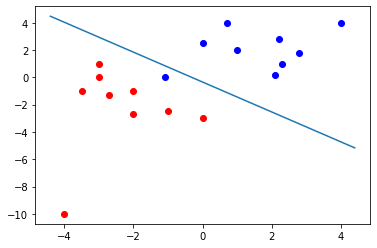

In [11]:
# Write your code here for C= 0.1
C = 0.1
svm_softconstraints(C)
plot_points(X, Y)
plot_decision_boundary()
plt.show()

Running for C =  3
Value of w =  [-1.73913043 -1.30434783]
Value of b =  -2.9130434782608705


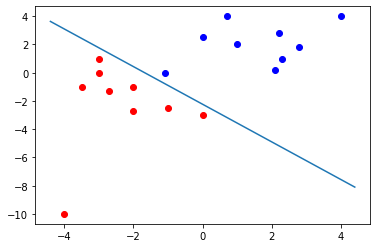

In [12]:
# Write your code here for C= 3
C = 3
svm_softconstraints(C)
plot_points(X, Y)
plot_decision_boundary()
plt.show()

Running for C =  10
Value of w =  [-1.73913043 -1.30434783]
Value of b =  -2.9130434782608705


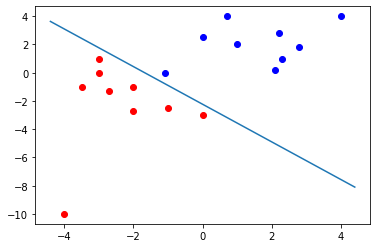

In [13]:
# Write your code here for C= 10
C = 10
svm_softconstraints(C)
plot_points(X, Y)
plot_decision_boundary()
plt.show()

Running for C =  100
Value of w =  [-1.73913043 -1.30434783]
Value of b =  -2.913043478260871


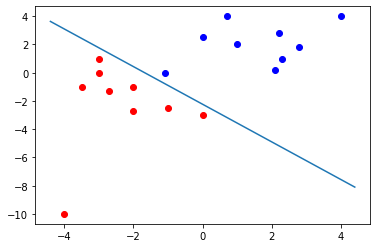

In [14]:
# Write your code here for C= 100
C = 100
svm_softconstraints(C)
plot_points(X, Y)
plot_decision_boundary()
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

Yes the decision boundary changes. In the code for qcqp program, the distance between the 2 margins ($w.x+b=1$ and $w.x +b = -1$) is maximized. When C=100, then any error is punished heavily due to which this program can be considered to be hard-margined. We want to maximize the distance between the two margins while making sure that points are on the correct side of margins. **So when support vectors are removed there is space for the margins to go due to which the line changes.**

Running for C =  100
Value of w =  [-0.38493724 -0.35146444]
Value of b =  -0.12133891213389121


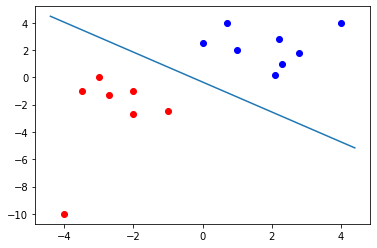

In [15]:
def remove_support_vectors():
  global X,Y
  ls = []
  X_rows = X.shape[0]
  augmented_X = np.hstack((X, np.ones((X_rows,1))))
  for (x, y, i) in zip(augmented_X, Y, range(augmented_X.shape[0])):
    if np.isclose(x.T@parameters, 1) or np.isclose(x.T@parameters, -1): # these points are +1 and -1 away, find them and delete them
      ls.append(i)
  X = np.delete(X, ls, axis=0)
  Y = np.delete(Y, ls, axis=0)

remove_support_vectors()
svm_softconstraints(100)
plot_points(X, Y)
plot_decision_boundary()
plt.show()

### Subsection 2

In [16]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-12-04 18:20:43--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.04s   

2021-12-04 18:20:43 (214 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-12-04 18:20:44--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labels-

In [17]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [18]:
mndata = MNIST('samples')
# Load training dataset
images, labels = mndata.load_training()
images_train = np.array(images)
labels_train = np.array(labels)
print("Shape of train set images = ", images_train.shape)
print("Shape of train set labels = ", labels_train.shape)
# Load testing dataset
images, labels = mndata.load_testing()
images_test = np.array(images)
labels_test = np.array(labels)
print("Shape of test set images = ", images_test.shape)
print("Shape of test set labels = ", labels_test.shape)

Shape of train set images =  (60000, 784)
Shape of train set labels =  (60000,)
Shape of test set images =  (10000, 784)
Shape of test set labels =  (10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [19]:
## Too much computation. Hence dividing testing data into train and test
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(images_test, labels_test)

In [20]:
temp = X_test
X_test = y_train
y_train = temp


Running for C =  1
Accuracy:  96.44
F1-score: 0.96434274669444
Confusion Matrix:
[[250   0   0   0   0   0   2   0   1   0]
 [  0 268   1   0   0   0   0   0   0   0]
 [  1   0 242   2   1   0   1   3   1   0]
 [  0   0   3 225   0   3   0   1   2   2]
 [  0   0   2   0 237   0   2   0   1   7]
 [  0   2   0   5   1 193   1   0   0   0]
 [  1   1   0   0   1   1 244   0   1   0]
 [  0   4   6   0   1   0   0 244   0   6]
 [  2   0   1   1   3   5   0   2 247   1]
 [  0   3   0   1   1   0   1   1   0 261]]

Running for C =  2
Accuracy:  97.0
F1-score: 0.9699651593432694
Confusion Matrix:
[[251   0   0   0   0   0   2   0   0   0]
 [  0 268   1   0   0   0   0   0   0   0]
 [  1   0 242   1   0   0   0   4   3   0]
 [  0   0   2 226   1   4   0   1   0   2]
 [  0   0   2   0 239   0   2   0   1   5]
 [  0   2   0   3   0 196   1   0   0   0]
 [  0   1   0   0   1   1 245   0   1   0]
 [  0   3   6   0   1   0   0 247   0   4]
 [  2   0   0   1   2   4   0   1 250   2]
 [  0   3   0   1

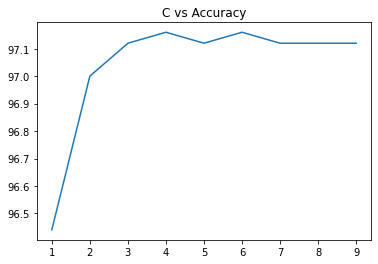

In [21]:
import sklearn.metrics
x = []
y = []

for C in range(1, 10):
  print("\nRunning for C = ", C)
  svm = SVC(C=C, kernel = 'rbf')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  acc = 100*sklearn.metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: ", acc)
  print("F1-score:", sklearn.metrics.f1_score(y_test, y_pred,average = 'weighted'))  
  print("Confusion Matrix:")
  print(sklearn.metrics.confusion_matrix(y_test, y_pred))
  x.append(C)
  y.append(acc)

plt.plot(x, np.array(y))
plt.title('C vs Accuracy')
plt.show()

In [22]:
for kernel in ("linear", "poly", "rbf"):
  print("\nKernel: ", kernel)
  svm = SVC(C=C, kernel = kernel)
  svm.fit(X_train, y_train)
  acc = 100*sklearn.metrics.accuracy_score(y_test, y_pred)
  y_pred = svm.predict(X_test)
  print("Accuracy: ", acc)
  print("F1-score: ", sklearn.metrics.f1_score(y_test, y_pred,average = 'weighted'))
  print("Confusion Matrix:")
  print(sklearn.metrics.confusion_matrix(y_test, y_pred))


Kernel:  linear
Accuracy:  97.11999999999999
F1-score:  0.9245427075878996
Confusion Matrix:
[[246   0   2   0   0   3   2   0   0   0]
 [  0 266   0   0   0   0   0   0   3   0]
 [  0   2 231   3   2   1   2   5   4   1]
 [  0   0   4 220   1   5   0   0   2   4]
 [  0   0   4   0 231   1   1   1   0  11]
 [  1   4   2  11   0 169   5   3   2   5]
 [  2   1   2   1   2   4 236   0   1   0]
 [  0   3   5   1   4   0   0 239   0   9]
 [  5   3   6   5   3   5   2   3 230   0]
 [  0   4   1   3   5   2   1   8   0 244]]

Kernel:  poly
Accuracy:  92.47999999999999
F1-score:  0.9580163960321679
Confusion Matrix:
[[247   1   1   0   0   1   3   0   0   0]
 [  0 267   0   0   0   0   0   0   2   0]
 [  3   2 240   0   0   0   0   4   2   0]
 [  0   3   0 223   1   4   0   1   2   2]
 [  0   2   4   0 236   0   1   1   0   5]
 [  1   3   0   4   0 193   1   0   0   0]
 [  0   3   1   0   0   1 242   0   1   1]
 [  0   6   2   1   0   0   0 248   0   4]
 [  2   1   4   2   3   4   0   1 244  